In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("./data/rent_price.csv",encoding="cp949") 

In [20]:
df

,town_name,전월세구분,건물용도,평당평균보증금,평당평균임대료,최대보증금,최소보증금,최대임대료,최소임대료
0,가락동,월세,단독다가구,413,5,30000,0,200,2
1,가락동,월세,아파트,1315,5,130000,100,600,4
2,가락동,월세,연립다세대,854,6,37000,0,240,1
3,가락동,월세,오피스텔,313,7,30000,500,130,10
4,가락동,전세,단독다가구,1340,0,38000,5000,0,0
...,...,...,...,...,...,...,...,...,...
2465,흥인동,월세,아파트,462,12,55700,1000,480,23
2466,흥인동,월세,오피스텔,369,10,15000,500,150,10
2467,흥인동,전세,단독다가구,275,0,2500,2500,0,0
2468,흥인동,전세,아파트,2591,0,142000,13600,0,0


In [57]:
df.rename(columns={"county_name":"town_name"},inplace=True)

In [58]:
new_df = df[df["전월세구분"]=="전세"]

In [63]:
new_df.to_csv("./data/rent_price_전세.csv",index=False)

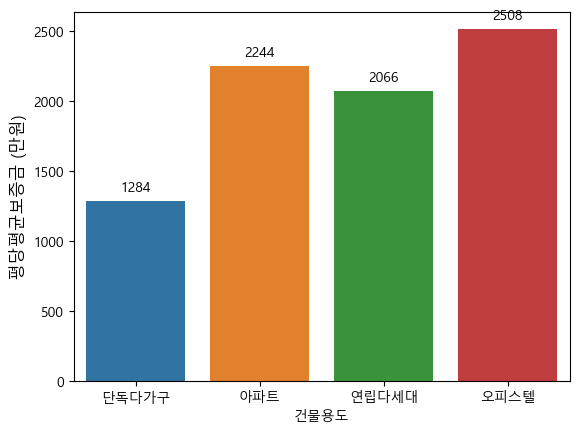

In [28]:
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# Seaborn barplot 생성
ax = sns.barplot(data=new_df, x="건물용도", y="평당평균보증금", errorbar=None)

# y축 라벨 설정
plt.ylabel("평당평균보증금 (만원)", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # 소수점 아래 한 자리까지 표시
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 위치 설정
                ha='center',  # 가운데 정렬
                va='center',  # 센터 정렬
                xytext=(0, 10),  # 텍스트 위치 조정
                textcoords='offset points')  # 위치 기준

plt.show()

<Axes: >

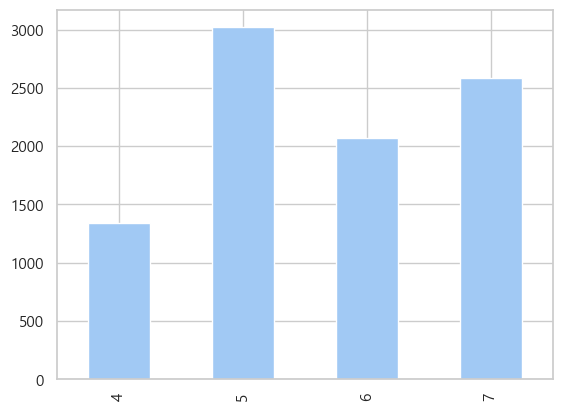

In [55]:
new_df[new_df["town_name"]=="가락동"]["평당평균보증금"].plot(kind="bar")

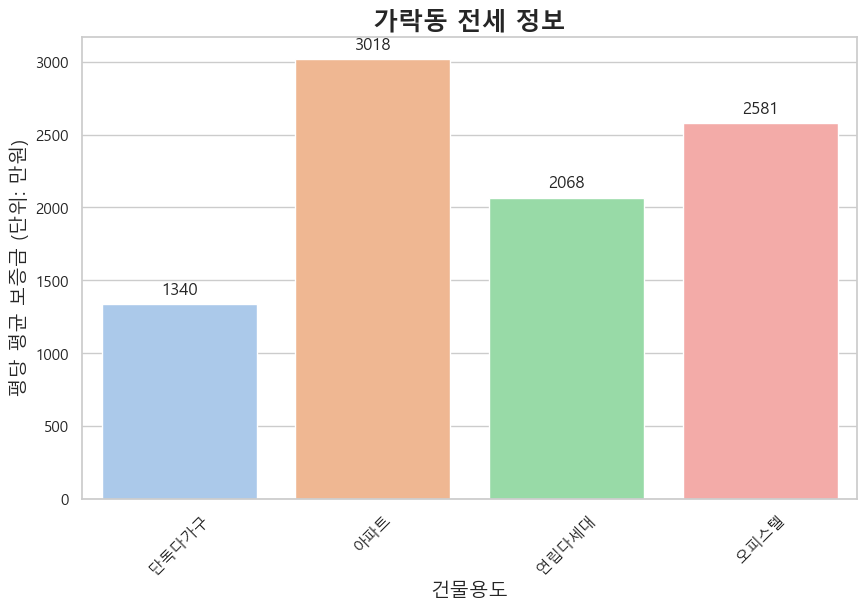

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_rent_info(town_name, df):
    sns.set(style="whitegrid", palette="pastel")  # 스타일 설정
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 해당 도시의 데이터 필터링
    filtered_data = new_df[new_df['town_name'] == town_name]

    plt.figure(figsize=(10, 6))  # 그래프 크기 설정
    ax = sns.barplot(data=filtered_data, x='건물용도', y='평당평균보증금', errorbar=None)  # 막대 그래프 생성

    ax.set_title(f'{town_name} 전세 정보', fontsize=18, fontweight='bold')  # 타이틀 설정
    ax.set_ylabel('평당 평균 보증금 (단위: 만원)', fontsize=14)  # y축 라벨 설정
    ax.set_xlabel('건물용도', fontsize=14)  # x축 라벨 설정
    plt.xticks(rotation=45)  # x축 레이블 회전

    # 각 막대 위에 데이터 값 표시
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}',  # 소수점 없이 정수로 표시
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 10),  # 텍스트 위치 조정
                    textcoords='offset points',
                    fontsize=12)

    plt.show()
    
plot_rent_info('가락동', df)

In [38]:
new_df["town_name"]

4        가락동
5        가락동
6        가락동
7        가락동
12      가리봉동
        ... 
2462     흑석동
2463     흑석동
2467     흥인동
2468     흥인동
2469     흥인동
Name: town_name, Length: 1224, dtype: object